Ejercicio de Redes neuronales recurrentes

 

Utilice una red neuronal recurrente para realizar la predicción de la cantidad de pasajeros de las aerolíneas internacionales (International-afílienlo-passengers). Se trata de un problema en el que, al cabo de un año y un mes, se recolecta el número de pasajeros de líneas aéreas internacionales en unidades de 1.000. Los datos van de enero de 1949 a diciembre de 1960 o 12 años, con 144 observaciones en total.

 

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
import os
os.chdir("/content/drive/My Drive/Deep Learning/Codigo")

In [0]:
!ls

In [0]:
# Importamos necesarios...
import math

import matplotlib.pyplot as plt
import numpy
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.layers import LSTM, Dense
from tensorflow.python.keras.models import Sequential

In [0]:
# Creacion del datataset
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [0]:

# Iniciamos la Semilla aleatoria
numpy.random.seed(7)

# Cargo un conjunto de datos
dataframe = read_csv('international-airline-passengers.csv',
                     usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normalizamos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# dividimos entre entranmiento y test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# Separamos datos de test y train
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# [muestras, pasos de tiempo, características]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 4s - loss: 0.0498
Epoch 2/100
 - 1s - loss: 0.0203
Epoch 3/100
 - 1s - loss: 0.0144
Epoch 4/100
 - 1s - loss: 0.0125
Epoch 5/100
 - 1s - loss: 0.0110
Epoch 6/100
 - 1s - loss: 0.0098
Epoch 7/100
 - 1s - loss: 0.0087
Epoch 8/100
 - 1s - loss: 0.0077
Epoch 9/100
 - 1s - loss: 0.0069
Epoch 10/100
 - 1s - loss: 0.0062
Epoch 11/100
 - 1s - loss: 0.0056
Epoch 12/100
 - 1s - loss: 0.0052
Epoch 13/100
 - 1s - loss: 0.0050
Epoch 14/100
 - 1s - loss: 0.0046
Epoch 15/100
 - 1s - loss: 0.0045
Epoch 16/100
 - 1s - loss: 0.0043
Epoch 17/100
 - 1s - loss: 0.0042
Epoch 18/100
 - 1s - loss: 0.0040
Epoch 19/100
 - 1s - loss: 0.0040
Epoch 20/100
 - 1s - loss: 0.0039
Epoch 21/100
 - 1s - loss: 0.0040
Epoch 22/100
 - 1s - loss: 0.0038
Epoch 23/100
 - 1s - loss: 0.0038
Epoch 24/100
 - 1s - loss: 0.0037
Epoch 25/100
 - 1s - loss

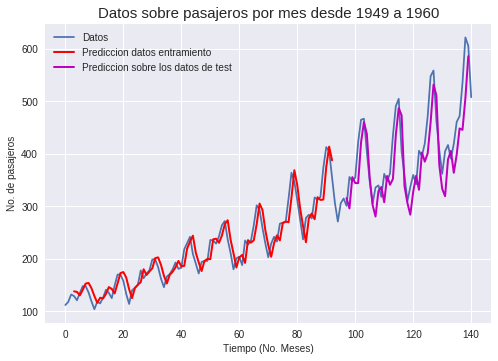

In [8]:
# creamos El modelo LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Realizamos las predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculo el Error rms
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Resultado del test: %.2f RMSE' % (testScore))

# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones del test de cambio para plotear
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2) +
                1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot, 'r', linewidth=2)
plt.plot(testPredictPlot, 'm', linewidth=2)
plt.legend(('Datos', 'Prediccion datos entramiento',
            'Prediccion sobre los datos de test'), loc='upper left')
plt.grid(True)
plt.title("Datos sobre pasajeros por mes desde 1949 a 1960", fontsize=15)
plt.xlabel("Tiempo (No. Meses)", fontsize=10)
plt.ylabel("No. de pasajeros", fontsize=10)
plt.show()